# Assignment 2: Fraud Detection

Author: Josh NM Blackmore <br>
StID: 201776628

## CASE STUDY

<p>An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. You can find the dataset above. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% (you might or might not be able to achieve such performance)</p>

## OBJECTIVES
- Aims

## PLAN
- Insert gantt chart here
- Talk about initial findings

## ANALYSIS OF THE CASE STUDY
- State key points

#### Initialising Permitted Python Packages and Other Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## PRE-PROCESSING
#### LOAD THE DATA FILES

In [2]:
claims_csv = "./Data/TrainData/Train_Claim.csv"
customers_withoutTarget_csv = "./Data/TrainData/Traindata_withoutTarget.csv"
customers_withTarget_csv = "./Data/TrainData/Traindata_with_Target.csv"
demographics_csv = "./Data/TrainData/Train_Demographics.csv"
policy_csv = "./Data/TrainData/Train_Policy.csv"
vehicle_csv = "./Data/TrainData/Train_Vehicle.csv"


claims_db = pd.read_csv(claims_csv)
customers_no_target_db = pd.read_csv(customers_withoutTarget_csv)
customers_target_db = pd.read_csv(customers_withTarget_csv)
demographics_db = pd.read_csv(demographics_csv)
policy_db = pd.read_csv(policy_csv)
vehicle_db = pd.read_csv(vehicle_csv)

## Analysing the data

In [3]:
claims_db.head(5)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


#### Checking structure and identifying any missing values

In [4]:
claims_db.shape

(28836, 19)

In [5]:
claims_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   28836 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

In [6]:
claims_db.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
dtype: int64

In [7]:
md = claims_db == "?"
md.sum()

CustomerID                   0
DateOfIncident               0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentState                0
IncidentCity                 0
IncidentAddress              0
IncidentTime                 0
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                    0
PoliceReport              9805
AmountOfTotalClaim           0
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
dtype: int64

#### Notes:
- No null values, however there are many fields replaced with "?" which counts as missing data.
- "?" likely means there was no occurance, such as no properties damaged, or report taken. 
- Note the no reports taken for later analysis
- No missing columns

In [8]:
claims_db.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000
mean,11.746047,1.823207,0.985782,7337.118428,7283.870197,37687.129387
std,6.170069,0.980099,0.784764,4427.638593,4375.842738,17977.048232
min,-5.000000,1.000000,0.000000,0.000000,0.000000,109.000000
25%,6.000000,1.000000,0.000000,4743.750000,4862.000000,32193.250000
50%,12.000000,1.000000,1.000000,7147.000000,7051.000000,42457.500000
75%,17.000000,3.000000,2.000000,10571.250000,10327.000000,49535.750000
max,23.000000,4.000000,2.000000,21450.000000,23670.000000,79560.000000


Notes:
- There are 13 categorical values
- There are 6 numerical values
- Witnesses should be numerical also, deal with "missingvalue" entries.

In [9]:
claims_db['DateOfIncident'].min(), claims_db['DateOfIncident'].max()

('2015-01-01', '2015-03-14')

In [10]:
policy_db.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [11]:
vehicle_db.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [12]:
 vehicle_db.sort_values(by=['CustomerID'], ascending=True).head(5)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
40353,Cust10000,VehicleModel,A5
97996,Cust10000,VehicleMake,Audi
5865,Cust10000,VehicleID,Vehicle26917
51765,Cust10000,VehicleYOM,2008
589,Cust10001,VehicleYOM,2006


In [13]:
claims_with_labels = pd.merge(claims_db, customers_target_db, on='CustomerID')
claims_condition_true = claims_with_labels['ReportedFraud'] == 'Y'

claims_with_labels[claims_condition_true].head(5)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
9,Cust1001,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,State7,City2,Location 1596,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
33,Cust1004,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,State3,City1,Location 2054,5,1,?,1,2,NO,63400,6340,6340,50720,Y
39,Cust10046,2015-01-06,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City2,Location 1060,15,1,NO,2,2,YES,78737,10717,13762,54258,Y
50,Cust1006,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,State7,City1,Location 2051,19,3,NO,0,2,NO,64100,6410,6410,51280,Y
59,Cust10073,2015-02-17,Parked Car,?,Trivial Damage,Police,State9,City2,Location 1943,7,1,?,0,1,YES,3197,581,292,2324,Y


In [14]:
claims_with_labels["ReportedFraud"].unique()

array(['N', 'Y'], dtype=object)

## Replacing all missing values to compare columns

In [15]:
claims_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   28836 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

In [16]:
columns = claims_with_labels.columns

counts = {}

for col in columns:
    count = claims_with_labels[col] == '?'
    
    counts[col] = len(claims_with_labels[count])
    
counts
    

{'CustomerID': 0,
 'DateOfIncident': 0,
 'TypeOfIncident': 0,
 'TypeOfCollission': 5162,
 'SeverityOfIncident': 0,
 'AuthoritiesContacted': 0,
 'IncidentState': 0,
 'IncidentCity': 0,
 'IncidentAddress': 0,
 'IncidentTime': 0,
 'NumberOfVehicles': 0,
 'PropertyDamage': 10459,
 'BodilyInjuries': 0,
 'Witnesses': 0,
 'PoliceReport': 9805,
 'AmountOfTotalClaim': 0,
 'AmountOfInjuryClaim': 0,
 'AmountOfPropertyClaim': 0,
 'AmountOfVehicleDamage': 0,
 'ReportedFraud': 0}

In [17]:
claims_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   28836 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

In [18]:
claims_with_labels

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712,N


#### Checking the feature correlation numerical only
- Higher vehicle damage often means higher injury claim thus also worse injuries the more damage sustained by the vehicle
- No strong correlations for time of incident for numerical values or amount of injuries or number of vehicles involved.


In [19]:
claims_correlation = claims_with_labels.corr()
claims_correlation

/tmp/ipykernel_98056/1823105520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  claims_correlation = claims_with_labels.corr()


,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
IncidentTime,1.000000,0.174673,-0.043154,0.225956,0.218062,0.272001
NumberOfVehicles,0.174673,1.000000,0.019637,0.254780,0.231888,0.287740
BodilyInjuries,-0.043154,0.019637,1.000000,0.031908,0.034103,0.026664
AmountOfInjuryClaim,0.225956,0.254780,0.031908,1.000000,0.622868,0.763172
AmountOfPropertyClaim,0.218062,0.231888,0.034103,0.622868,1.000000,0.778821
AmountOfVehicleDamage,0.272001,0.287740,0.026664,0.763172,0.778821,1.000000


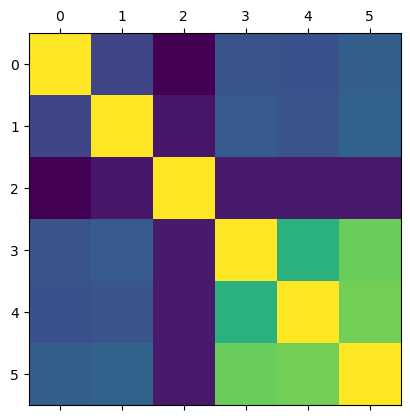

In [20]:
plt.matshow(claims_correlation)
plt.show()

## Clustering Practice

In [21]:
claims_db.head(5)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


#### Analysing the categorical values

In [22]:
list(claims_db["TypeOfIncident"].unique())

['Multi-vehicle Collision',
 'Single Vehicle Collision',
 'Parked Car',
 'Vehicle Theft']

In [23]:
list(claims_db["TypeOfCollission"].unique())

['Side Collision', 'Rear Collision', 'Front Collision', '?']

In [24]:
list(claims_db["SeverityOfIncident"].unique())

['Total Loss', 'Minor Damage', 'Major Damage', 'Trivial Damage']

In [25]:
list(claims_db["AuthoritiesContacted"].unique())

['Police', 'Other', 'Fire', 'Ambulance', 'None']

In [26]:
list(claims_db["IncidentState"].unique())

['State7', 'State8', 'State9', 'State5', 'State6', 'State4', 'State3']

In [27]:
len(claims_db["IncidentAddress"].unique())

1000

In [28]:
list(claims_db["PropertyDamage"].unique())

['?', 'YES', 'NO']

In [29]:
list(claims_db["PoliceReport"].unique())

['?', 'YES', 'NO']

In [30]:
list(claims_db["Witnesses"].unique())

['0', '1', '3', '2', 'MISSINGVALUE']

In [31]:
claims_db["Witnesses"].value_counts()

2               8449
1               8345
0               6128
3               5868
MISSINGVALUE      46
Name: Witnesses, dtype: int64

In [32]:
claims_clust_db = claims_db.copy()
claims_clust_db.drop(["CustomerID", "DateOfIncident", "IncidentState", "IncidentCity", "IncidentAddress", "PropertyDamage", "Witnesses", "AmountOfTotalClaim"], axis=1, inplace=True)
claims_clust_db.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,PoliceReport,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17,3,1,?,13417,6071,46013
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10,3,2,YES,15560,5919,39903
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,2,NO,11630,11630,43495
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22,1,2,NO,12003,12003,42237
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10,1,2,YES,8829,7234,37481


## Encoding catagorical data to be numeric

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
le = LabelEncoder()

cat_cols = ["TypeOfIncident", "TypeOfCollission", "SeverityOfIncident", "AuthoritiesContacted", "PoliceReport"]

X = claims_clust_db

X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [35]:
X.head(5)

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,PoliceReport,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,0,3,2,4,17,3,1,0,13417,6071,46013
1,0,3,2,4,10,3,2,2,15560,5919,39903
2,2,3,1,3,22,1,2,1,11630,11630,43495
3,2,3,1,3,22,1,2,1,12003,12003,42237
4,2,2,1,1,10,1,2,2,8829,7234,37481


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   TypeOfIncident         28836 non-null  int64
 1   TypeOfCollission       28836 non-null  int64
 2   SeverityOfIncident     28836 non-null  int64
 3   AuthoritiesContacted   28836 non-null  int64
 4   IncidentTime           28836 non-null  int64
 5   NumberOfVehicles       28836 non-null  int64
 6   BodilyInjuries         28836 non-null  int64
 7   PoliceReport           28836 non-null  int64
 8   AmountOfInjuryClaim    28836 non-null  int64
 9   AmountOfPropertyClaim  28836 non-null  int64
 10  AmountOfVehicleDamage  28836 non-null  int64
dtypes: int64(11)
memory usage: 2.4 MB


## Feature scaling the data, preperation for the model

In [37]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
ms = MinMaxScaler()

In [38]:
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

In [39]:
X.head(5)

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,BodilyInjuries,PoliceReport,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,0.000000,1.000000,0.666667,1.00,0.785714,0.666667,0.5,0.0,0.625501,0.256485,0.577765
1,0.000000,1.000000,0.666667,1.00,0.535714,0.666667,1.0,1.0,0.725408,0.250063,0.500862
2,0.666667,1.000000,0.333333,0.75,0.964286,0.000000,1.0,0.5,0.542191,0.491339,0.546072
3,0.666667,1.000000,0.333333,0.75,0.964286,0.000000,1.0,0.5,0.559580,0.507098,0.530239
4,0.666667,0.666667,0.333333,0.25,0.535714,0.000000,1.0,1.0,0.411608,0.305619,0.470378


## K-Means model with two clusters

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

/home/kcorb/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [41]:
kmeans.inertia_

25213.469585734558